# Data Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Step 1: Data Loading

In [2]:
# description of the data: https://www.kaggle.com/c/titanic/data
df = pd.read_csv('./train.csv')
df.head(n=7)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S


In [3]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


## Step 2: Data Analyzing

In this data, the most important column is 'Survived'. Check the relationship between the 'Survived' column and the others.

In [4]:
df[['Pclass', 'Survived']].groupby(['Pclass']).mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [5]:
#TODO
#Try with 'Sex'
df[["Sex", "Survived"]].groupby(['Sex']).mean()

,Survived
Sex,
female,0.742038
male,0.188908


In [6]:
#TODO
#Try with 'Age', but calculate the average value based on their survival fact
df[["Age", "Survived"]].groupby(['Survived']).mean()

,Age
Survived,
0,30.626179
1,28.343690


In [7]:
#TODO
#Try with 'Fare', but calculate the average value based on their survival fact
df[["Fare", "Survived"]].groupby(['Survived']).mean()

,Fare
Survived,
0,22.117887
1,48.395408


In [8]:
#TODO
#Try with 'SibSp', but calculate the surviving rate
df[["SibSp", "Survived"]].groupby(['SibSp']).mean()

,Survived
SibSp,
0,0.345395
1,0.535885
2,0.464286
3,0.250000
4,0.166667
5,0.000000
8,0.000000


In [9]:
#TODO
#Try with 'Parch', but calculate the surviving rate
df[["Parch", "Survived"]].groupby(['Parch']).mean()

,Survived
Parch,
0,0.343658
1,0.550847
2,0.500000
3,0.600000
4,0.000000
5,0.200000
6,0.000000


In [10]:
#TODO
#Try with 'Embarked', but calculate the average value based on their survival fact
df[["Embarked", "Survived"]].groupby(['Embarked']).mean()

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


### You can also visualize some data if you need!

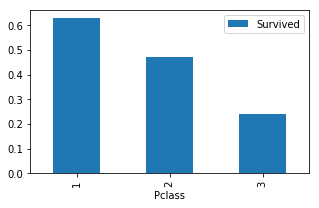

In [11]:
df[['Pclass', 'Survived']].groupby(['Pclass']).mean().plot(kind='bar',figsize=(5,3))
plt.show()

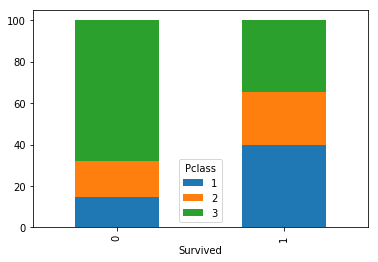

In [12]:
#TODO
#Y axis should be the percentage of each class in the survival group and other group
df.groupby(['Survived','Pclass']).size().groupby(level=0)\
.apply(lambda x: 100 * x / float(x.sum())).unstack().plot(kind='bar',stacked=True)
plt.show()

## Step 3: Missing Data Handling

In [13]:
# Based on this infomration, 
# we have some missing data on 'Age', 'Cabin', 'Embarked' information.
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [14]:
df_new = df.copy()

In [15]:
#TODO

new_ages = df[['Sex','Age','Pclass']].groupby(['Sex','Pclass']).median()

new_ages

Age
Sex    Pclass      
female 1       35.0
       2       28.0
       3       21.5
male   1       40.0
       2       30.0
       3       25.0

In [16]:
#TODO
df_new['Age']=df.apply(\
                   lambda x: new_ages.loc[x['Sex']].loc[x['Pclass']][0] \
                   if pd.isnull(x['Age']) else x['Age'], axis=1)

In [17]:
df_new.head(n=7)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,25.0,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S


In [18]:
df_new.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            891
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [19]:
df["Age"].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [20]:
df_new["Age"].describe()

count    891.000000
mean      29.112424
std       13.304424
min        0.420000
25%       21.500000
50%       26.000000
75%       36.000000
max       80.000000
Name: Age, dtype: float64

Final step: Make your own missing data handler!